<a href="https://colab.research.google.com/github/hsabaghpour/Deep-Learning/blob/main/DL_1_imgClassification_with_Maryam_Sadeghi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
from tensorflow import keras
from keras.constraints import MaxNorm
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization

from sklearn.preprocessing import OneHotEncoder


#from keras.utils import np_utils

In [99]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [103]:
# Normalize the input from 0-255 to between 0 and 1 by dividing by 255

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [105]:
# One-hot encode outputs

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [45]:
num_class = y_test.shape[1] #10

# Building the Model

In [53]:
model  = Sequential()

model.add(Conv2D(32,(3,3), padding = 'same', input_shape = X_train.shape[1:],activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding = 'same',activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Conv2D(64,(3,3), padding = 'same',activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(BatchNormalization())



model.add(Conv2D(128,(3,3), padding = 'same',activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(MaxPool2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Dense(32, activation ='relu'))

model.add(Dense(num_class, activation='softmax'))

#Output Layer





# After Creating the model we need to Comile it and create loss Function

In [54]:
#model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy' , 'val_acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)       

## Now let's train the Model !

In [56]:
history = model.fit(X_train, y_train , validation_data =(X_test, y_test) , epochs = 30 , batch_size = 64 )

Epoch 1/30
782/782 [==============================] - 15s 14ms/step - loss: 1.4821 - accuracy: 0.4743 - val_loss: 1.2314 - val_accuracy: 0.5632
Epoch 2/30
782/782 [==============================] - 11s 14ms/step - loss: 1.0421 - accuracy: 0.6310 - val_loss: 0.9549 - val_accuracy: 0.6639
Epoch 3/30
782/782 [==============================] - 11s 14ms/step - loss: 0.8794 - accuracy: 0.6896 - val_loss: 0.8212 - val_accuracy: 0.7145
Epoch 4/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7996 - accuracy: 0.7175 - val_loss: 0.7952 - val_accuracy: 0.7208
Epoch 5/30
782/782 [==============================] - 11s 14ms/step - loss: 0.7405 - accuracy: 0.7387 - val_loss: 0.7175 - val_accuracy: 0.7511
Epoch 6/30
782/782 [==============================] - 11s 14ms/step - loss: 0.6926 - accuracy: 0.7586 - val_loss: 0.7539 - val_accuracy: 0.7360
Epoch 7/30
782/782 [==============================] - 11s 14ms/step - loss: 0.6614 - accuracy: 0.7677 - val_loss: 0.7725 - val_accuracy:

In [57]:
for k,l in history.history.items():
  print(k)

loss
accuracy
val_loss
val_accuracy


<Axes: >

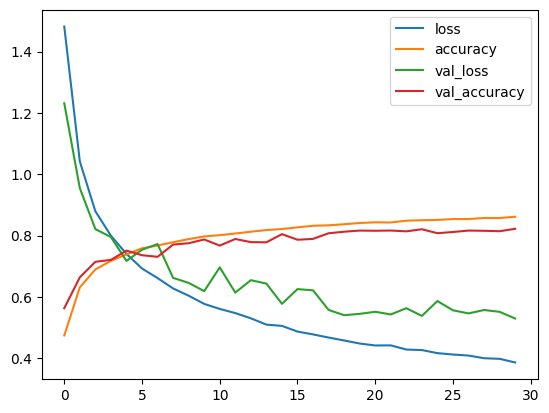

In [58]:
import pandas as pd

pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

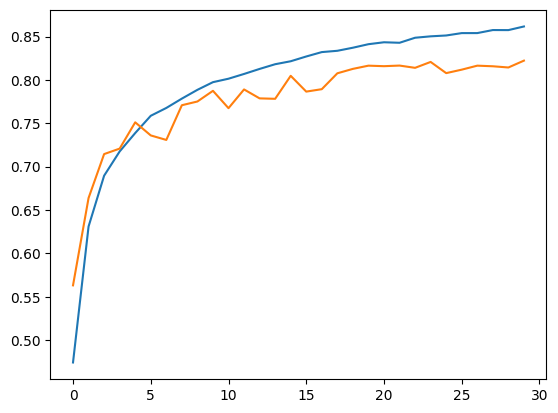

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show


In [61]:
model.save('CNN_cifar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
model_2 = load_model('CNN_cifar10.h5')

In [63]:
model_2.predict(X_test[0:10])[0]

1/1 [==============================] - 0s 279ms/step


array([1.86969555e-04, 2.14680276e-05, 2.73293117e-03, 9.24227536e-01,
       2.68387084e-04, 7.05857351e-02, 1.37100683e-03, 4.91225102e-04,
       1.09980836e-04, 4.74650460e-06], dtype=float32)

In [64]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Confusion Matrix

In [83]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

313/313 [==============================] - 1s 3ms/step


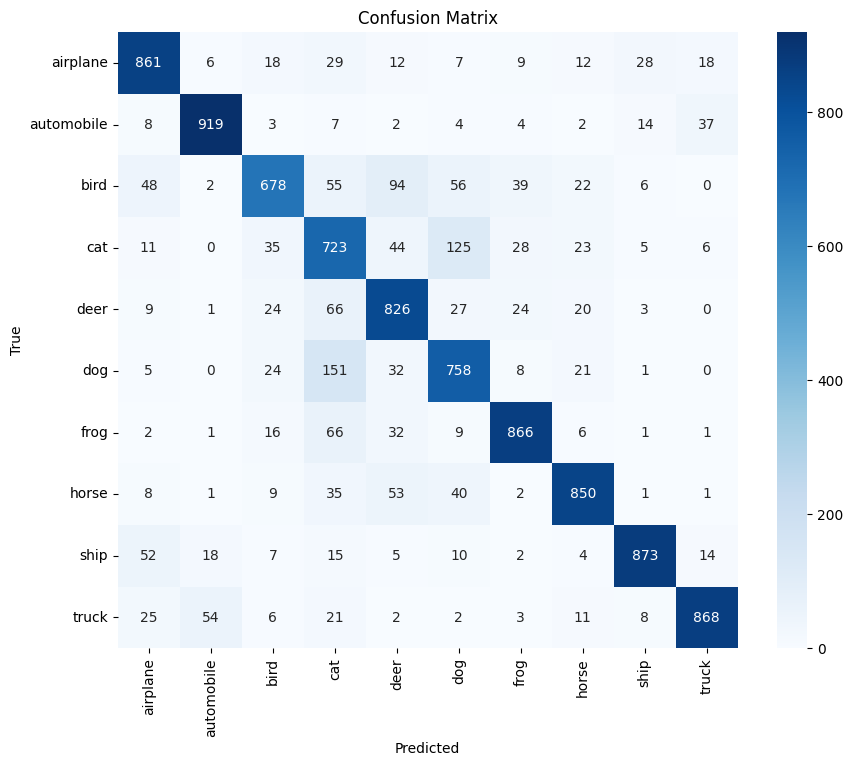

In [86]:

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've trained your model and have predictions
predictions = model.predict(X_test)
predictions_classes = np.argmax(predictions, axis=1)  # Convert one-hot encoded predictions to class labels

# Assuming y_test is the true labels (ground truth)
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Create confusion matrix
conf_mat = confusion_matrix(y_test_classes, predictions_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
